Import NUMPY, PANDAs, MATPLOT, SEABONR, and data frame from "https://opendata.cityofnewyork.us/", where I found "NYPD_Personnel_Demographics_20251217.csv".

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/Yangster007/Python-Project/refs/heads/main/NYPD_Personnel_Demographics_20251217.csv")
df.head()
df.sample(10)

,Gender,Race,MOS_Type,ranklit,sex,appdate,YearsOnJob,YearsOnJob (bins)
7359,Male,Hispanic,Uniform,Police Officer,Male,07/05/2017,8,5
34826,Male,Hispanic,Uniform,Detective,Male,07/21/2008,17,15
24385,Female,Hispanic,Civilian,Other,Female,06/13/2025,0,0
19518,Female,Hispanic,Uniform,Police Officer,Female,07/05/2023,2,0
8810,Male,Hispanic,Uniform,Police Officer,Male,10/19/2022,3,0
35821,Male,White,Uniform,Detective,Male,01/09/2013,12,10
6485,Male,Hispanic,Uniform,Police Officer,Male,07/01/2002,23,20
38282,Male,Black,Uniform,Lieutenant,Male,07/10/2006,19,15
39981,Male,Hispanic,Civilian,SSA,Male,01/29/2020,5,5
26884,Female,Black,Civilian,PAA,Female,08/14/2006,19,15


First is to exam data to understand what's rows, columns, and type of data are available in the data frame

In [2]:
print('Shape (rows, columns):', df.shape)

print('\nColumn names:')
print(df.columns)

print('\nData types and non-null counts:')
df.info()

print('\nSummary statistics (numeric columns):')
df.describe()

Shape (rows, columns): (49675, 8)

Column names:
Index(['Gender', 'Race', 'MOS_Type', 'ranklit', 'sex', 'appdate', 'YearsOnJob',
       'YearsOnJob (bins)'],
      dtype='object')

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49675 entries, 0 to 49674
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             49675 non-null  object
 1   Race               49675 non-null  object
 2   MOS_Type           49675 non-null  object
 3   ranklit            49675 non-null  object
 4   sex                49675 non-null  object
 5   appdate            49675 non-null  object
 6   YearsOnJob         49675 non-null  int64 
 7   YearsOnJob (bins)  49675 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 3.0+ MB

Summary statistics (numeric columns):


,YearsOnJob,YearsOnJob (bins)
count,49675.000000,49675.000000
mean,10.223452,8.282738
std,8.271955,8.146371
min,0.000000,0.000000
25%,3.000000,0.000000
50%,9.000000,5.000000
75%,17.000000,15.000000
max,58.000000,55.000000


Exam any missing and unique values for each columns

In [3]:
print('Missing values per column:')
print(df.isna().sum())

print('\nPercentage of missing values per column:')
print((df.isna().mean() * 100).round(2))

print('\nNumber of unique values per column:')
print(df.nunique())

Missing values per column:
Gender               0
Race                 0
MOS_Type             0
ranklit              0
sex                  0
appdate              0
YearsOnJob           0
YearsOnJob (bins)    0
dtype: int64

Percentage of missing values per column:
Gender               0.0
Race                 0.0
MOS_Type             0.0
ranklit              0.0
sex                  0.0
appdate              0.0
YearsOnJob           0.0
YearsOnJob (bins)    0.0
dtype: float64

Number of unique values per column:
Gender                  5
Race                    5
MOS_Type                2
ranklit                20
sex                     5
appdate              1943
YearsOnJob             51
YearsOnJob (bins)      12
dtype: int64


Clean up column names and standardize format

In [4]:
df.columns = (
    df.columns
      .str.strip()
      .str.upper()
      .str.replace(' ', '_')
      .str.replace('-', '_')
)
df.columns

Index(['GENDER', 'RACE', 'MOS_TYPE', 'RANKLIT', 'SEX', 'APPDATE', 'YEARSONJOB',
       'YEARSONJOB_(BINS)'],
      dtype='object')

I pick "Race" and "Gender" as initial measurement, since I would like to understand Asian representation in NYPD. I want to use how many unique value in Gender to formulate my analysis.

In [130]:
df['RACE'].unique()
df['GENDER'].unique()

array(['Male', 'Female', 'Non-Binary', 'Unspecified', 'Unknown'],
      dtype=object)

I further exam what are the uniqu values in Race, Gender, Ranklit, and Mos_tpye to formulate my analysis

In [20]:
cols_to_check = ['RACE', 'GENDER','RANKLIT','MOS_TYPE']

for col in cols_to_check:
    print(f"--- Unique values in {col} ---")
    print(sorted(df[col].unique()))
    print("\n")

--- Unique values in RACE ---
['Asian', 'Black', 'Hispanic', 'Native American', 'White']


--- Unique values in GENDER ---
['Female', 'Male', 'Non-Binary', 'Unknown', 'Unspecified']


--- Unique values in RANKLIT ---
['ASSISTANT CHIEF', 'Cadet', 'Captain', 'Chief', 'Deputy Chief', 'Deputy Inspector', 'Detective', 'Inspector', 'Lieutenant', 'Other', 'PAA', 'PCT', 'PRAA', 'Police Officer', 'SCG', 'SPAA', 'SSA', 'Sergeant', 'Surgeon', 'TEA']


--- Unique values in MOS_TYPE ---
['Civilian', 'Uniform']




Checking the population by RACE to make sure there are enough data for my analysis, which is based on Asian. My analysis would be meaningless if there isn't any / enough data for Asian. There is 6870 Asian in the data.

In [7]:
df[['RACE', 'GENDER']].value_counts().sort_index()

RACE             GENDER     
Asian            Female          1358
                 Male            5507
                 Non-Binary         2
                 Unknown            2
                 Unspecified        1
Black            Female          7589
                 Male            5298
                 Non-Binary         3
                 Unspecified        2
Hispanic         Female          5777
                 Male            9112
                 Non-Binary         2
                 Unknown            1
                 Unspecified        1
Native American  Female            40
                 Male              31
White            Female          2944
                 Male           11982
                 Non-Binary        10
                 Unknown            2
                 Unspecified       11
Name: count, dtype: int64

I dropped Gender unknown and unspecified .. Just to pratice the function.

In [18]:
df1 = df[(df['GENDER'] !='Unknown') & (df['GENDER'] !='Unspecified')]
pd.crosstab(df1['RACE'], df1['GENDER'])

GENDER,Female,Male,Non-Binary
RACE,,,
Asian,1358,5507,2
Black,7589,5298,3
Hispanic,5777,9112,2
Native American,40,31,0
White,2944,11982,10


Here I defined the datafram for Asian and Non-Asian and Group Years on Job by 10yrs bucket, which is a new column added, so the analysis and graphs won't be endless rows / columns. I check the result is good.

In [88]:
df2 = df[df['RACE'] == 'Asian'].copy()
df3 = df[df['RACE']!= 'Asian'].copy()

max_years = int(df['YEARSONJOB'].max())
bins = list(range(0, max_years + 11, 10))
labels = [f'{i}-{i+10}' for i in bins[:-1]]

df2['YEARS_GROUPED'] = pd.cut(df2['YEARSONJOB'], bins=bins, labels=labels, right=False)
df3['YEARS_GROUPED'] = pd.cut(df3['YEARSONJOB'], bins=bins, labels=labels, right=False)

df2.sample (10)
df2[['GENDER','MOS_TYPE', 'RANKLIT', 'YEARS_GROUPED']].value_counts().sort_index()


GENDER       MOS_TYPE  RANKLIT         YEARS_GROUPED
Female       Civilian  Cadet           0-10               7
                       Other           0-10             144
                                       10-20             49
                                       20-30             14
                                       30-40              1
                                                       ... 
Non-Binary   Uniform   Police Officer  0-10               1
                       Sergeant        10-20              1
Unknown      Civilian  PAA             0-10               1
             Uniform   Police Officer  0-10               1
Unspecified  Uniform   Police Officer  0-10               1
Name: count, Length: 104, dtype: int64

Visulize the by Asain vs non Asian, by gender, and by MOS Type. For both Asian and Non-Asian, male are mainly Uniform and female are mainly Civilian. However, the Civilan % of non-Asian female is almost double to that of Asian female.

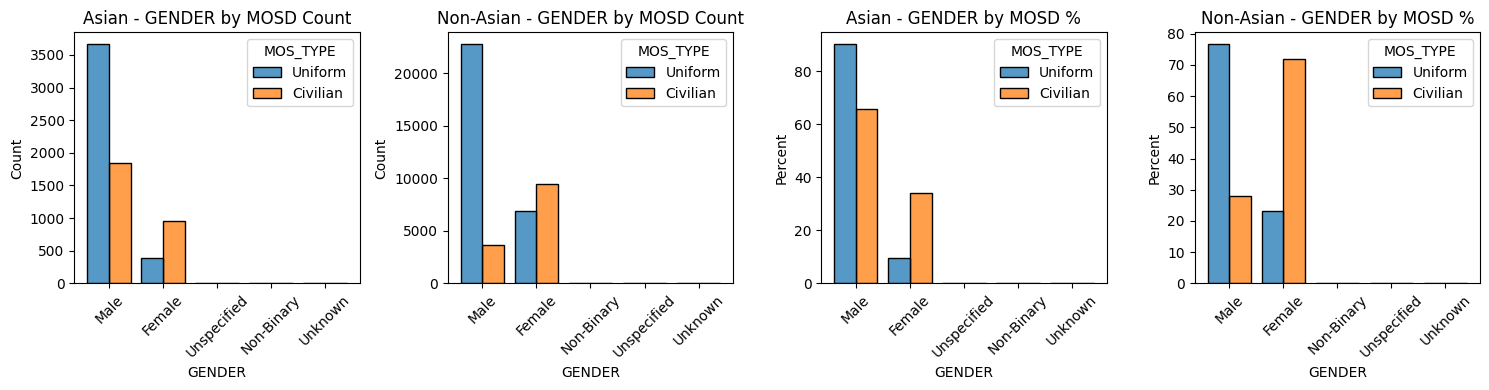

In [89]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4))

sns.histplot(data=df2, x='GENDER', hue='MOS_TYPE', multiple="dodge", shrink=.8, ax=axes[0])
axes[0].set_title('Asian - GENDER by MOSD Count')
axes[0].tick_params(axis='x', rotation=45)

sns.histplot(data=df3, x='GENDER', hue='MOS_TYPE', multiple="dodge", shrink=.8, ax=axes[1])
axes[1].set_title('Non-Asian - GENDER by MOSD Count')
axes[1].tick_params(axis='x', rotation=45)

sns.histplot(data=df2, x='GENDER', hue='MOS_TYPE', multiple="dodge", shrink=.8, ax=axes[2], stat='percent', common_norm=False)
axes[2].set_title('Asian - GENDER by MOSD %')
axes[2].tick_params(axis='x', rotation=45)

sns.histplot(data=df3, x='GENDER', hue='MOS_TYPE', multiple="dodge", shrink=.8, ax=axes[3], stat='percent', common_norm=False)
axes[3].set_title('Non-Asian - GENDER by MOSD %')
axes[3].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Majority of NYPD are on the job less than 10 years both Asian and non-Asian. Non-Asian does have more over 10 years on the job % respectively than Asian.  

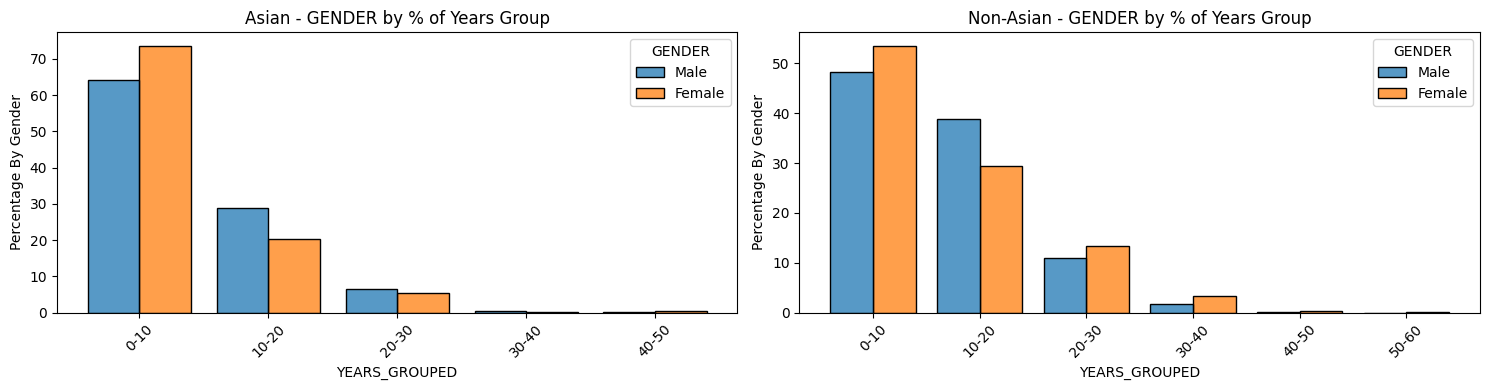

In [100]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

keep_genders = ['Male', 'Female']
df2_1 = df2[df2['GENDER'].isin(keep_genders)]
df3_1 = df3[df3['GENDER'].isin(keep_genders)]

sns.histplot(data=df2_1, x='YEARS_GROUPED', hue='GENDER', multiple="dodge", shrink=.8, ax=axes[0],stat='percent', common_norm=False)
axes[0].set_title('Asian - GENDER by % of Years Group')
axes[0].set_ylabel('Percentage By Gender')
axes[0].tick_params(axis='x', rotation=45)

sns.histplot(data=df3_1, x='YEARS_GROUPED', hue='GENDER', multiple="dodge", shrink=.8, ax=axes[1],stat='percent', common_norm=False)
axes[1].set_title('Non-Asian - GENDER by % of Years Group')
axes[1].set_ylabel('Percentage By Gender')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


2 out of top 5 ranks are different between Asian and non-Asian. Asian has TEA / SCG vs non-Asian has Detective and SSA instead.

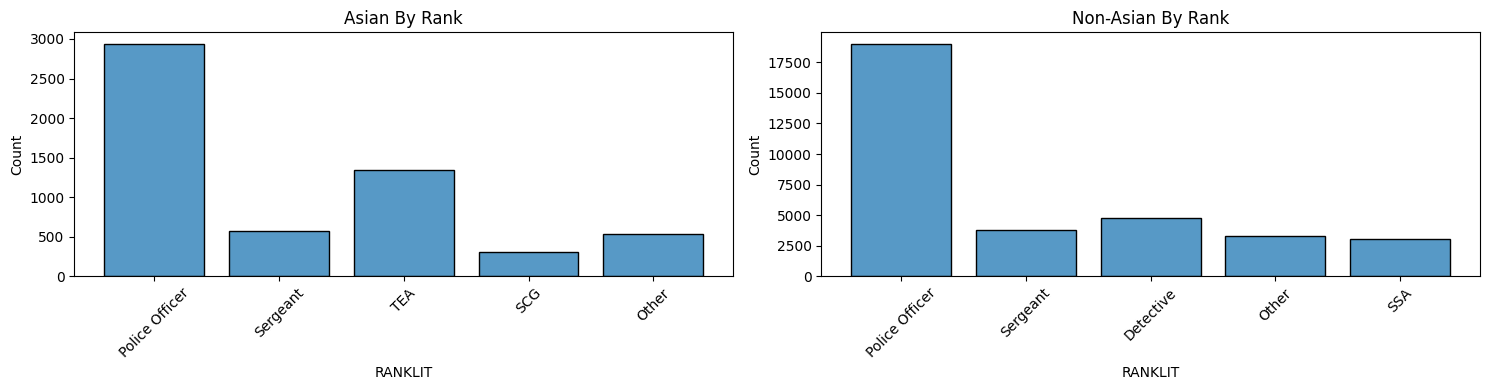

In [113]:
top_5_ranks = df2['RANKLIT'].value_counts().nlargest(5).index
df2_2 = df2[df2['RANKLIT'].isin(top_5_ranks)]

top_5_ranks = df3['RANKLIT'].value_counts().nlargest(5).index
df3_2 = df3[df3['RANKLIT'].isin(top_5_ranks)]

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.histplot(data=df2_2, x='RANKLIT', shrink=.8, ax=axes[0])
axes[0].set_title('Asian By Rank')
axes[0].tick_params(axis='x', rotation=45)

sns.histplot(data=df3_2, x='RANKLIT', shrink=.8, ax=axes[1])
axes[1].set_title('Non-Asian By Rank')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

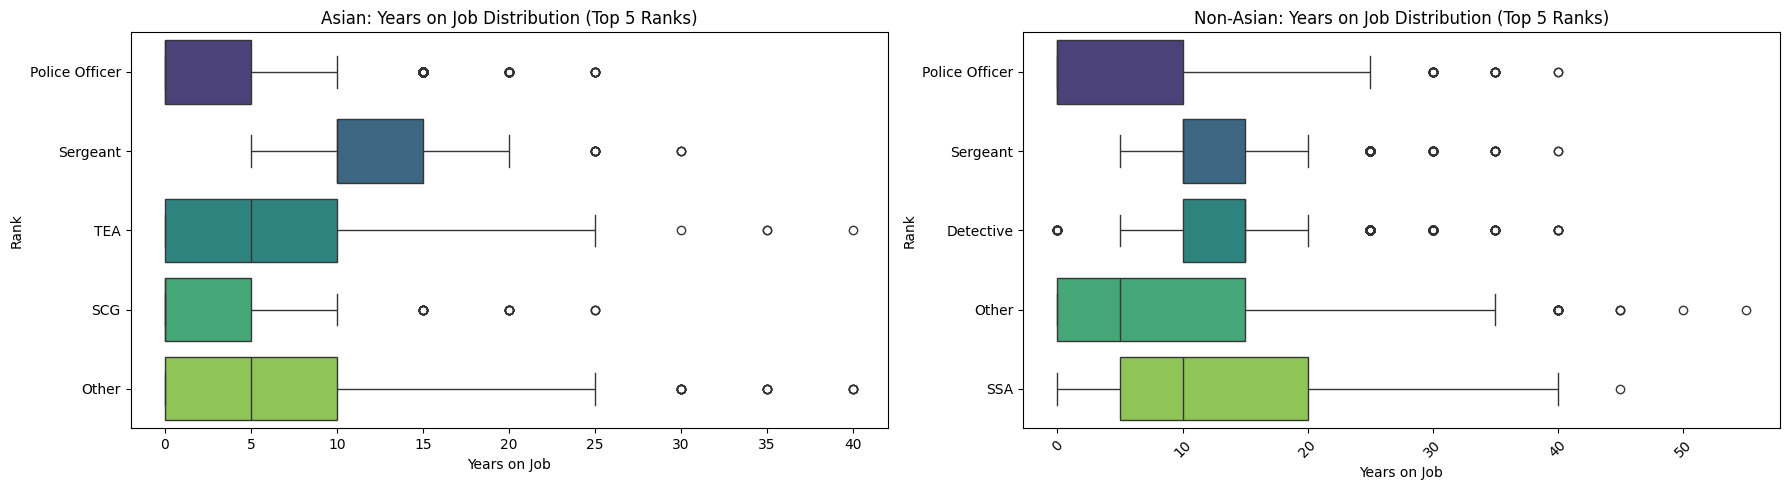

In [129]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

sns.boxplot(data=df2_2, x='YEARSONJOB_(BINS)', y='RANKLIT', palette='viridis', hue='RANKLIT', legend=False, ax=axes[0])
axes[0].axes.set_title('Asian: Years on Job Distribution (Top 5 Ranks)')
axes[0].axes.set_ylabel('Rank')
axes[0].axes.set_xlabel('Years on Job')
plt.xticks(rotation=45)

sns.boxplot(data=df3_2, x='YEARSONJOB_(BINS)', y='RANKLIT', palette='viridis', hue='RANKLIT', legend=False, ax=axes[1])
axes[1].axes.set_title('Non-Asian: Years on Job Distribution (Top 5 Ranks)')
axes[1].axes.set_ylabel('Rank')
axes[1].axes.set_xlabel('Years on Job')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

Asian follows same pattern of overall NYPD, including malve vs female and uniform vs civilian metrics. However, Asian has younger on the job years.  